#### CSCI-UA.0473-​001 Introduction to Machine Learning

# Homework 5


### Name: Christina Liu


### Due: Nov. 27, 2019


## Goal:  The goal of this homework is to practice implementing PCA and NMF in Sci-kit learn.

In [86]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.decomposition import PCA, NMF

## 0. Getting Data

**For this part there is nothing to implement**

However, please review the documentation for [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) and [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to see what these functions do.  Here is more information on the [dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html).


Recall that for dimensionality reduction we form the matrix
$$
{\bf X} = [{\bf x}_1; {\bf x}_2; \ldots; {\bf x}_N] \in \mathbb{R}^{d\times N}
$$
where ${\bf x}_i \in \mathbb{R}^d$ is the dimension of the data and $N$ is the number of training points.  We want to find a **dictionary** matrix ${\bf W}$ and a **code** matrix ${\bf Z}$ such that ${\bf X} \approx {\bf WZ}$.  Dimensionality reduction comes in when we select ${\bf W} \in \mathbb{R}^{d \times q}$ and ${\bf Z} \in \mathbb{R}^{q\times N}$ with $q \ll d$.

In [87]:
# Load in the data.
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

tfidf_vectorizer = TfidfVectorizer(min_df = 30)

# The data matrix X and the targets y.
X = (tfidf_vectorizer.fit_transform(newsgroups_train.data).T).todense()
y = newsgroups_train.target

(d, N) = X.shape
print("X has shape (d, N) = ", X.shape)

# The reduced dimension.
q = 5

X has shape (d, N) =  (1771, 2369)


The data has dimension $d = 1771$.  We will reduce this to dimension $q = 5$.

## 1. Training with PCA

### Part (a)
Using the PCA implemented in Sci-Kit learn, obtain the low-dimensional projection of ${\bf X}$ (i.e. get ${\bf W}$ and ${\bf Z}$) for when $q = 5$.  Read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) carefully.  In particular, make sure you are computing the correct ${\bf W}$ and ${\bf Z}$.

In [88]:
## TO DO STARTS HERE ##
pca = PCA(n_components=q)

W = pca.fit_transform(X)
Z=pca.components_

## TO DO ENDS HERE ##

print("W has shape ", W.shape)
print("Z has shape ", Z.shape)

W has shape  (1771, 5)
Z has shape  (5, 2369)


### Part (b)

The matrix ${\bf Z} = [{\bf z}_1,\ldots,{\bf z}_N]$ is the matrix of the reduced data.  Make a scatter plot of the data projected onto its first two principal components.  In other words, form a scatter plot of all the ${\bf z}_i$ with the first component as the $x$-axis and the second component as the $y$-axis.  Set the color bar so that the points are colored corresponding to their target label ${\bf y}$ (which was defined earlier in the code).

COMPONENT 1
for you it that in is and of to the

COMPONENT 2
chastity cadre dsl shameful edu cs gordon banks geb pitt

COMPONENT 3
is of gordon he banks geb that pitt we god

COMPONENT 4
system centris church quadra scsi apple drive mac of the

COMPONENT 5
thanks we is monitor se god university apple mac edu



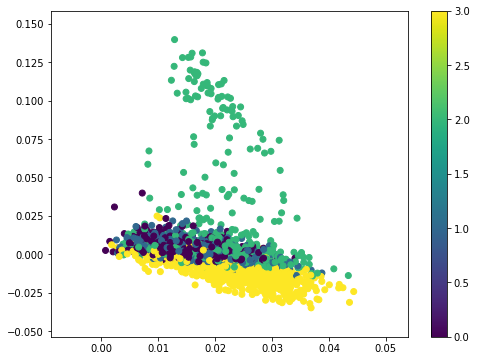

In [89]:
## TO DO STARTS HERE ##
plt.figure(figsize=(8, 6))
plt.scatter(Z[0,:], Z[1,:], c = y)
plt.colorbar()

## TO DO ENDS HERE ##

# Also print out the first q components.  There is nothing to do for this part.
loadings = W.T
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])

for i in range(q):
    insens_idx = np.argsort(loadings[i])

    print ('COMPONENT ' + str(i + 1))
    print (' '.join([invocab[w_ix] for w_ix in insens_idx[-10:]]) + '\n')

### Part (c)

Recall that for PCA the dictionary and code matrices ${\bf W},{\bf Z}$ can be found using either an eigenvalue decomposition or the SVD.  Suppose the matrix ${\bf X}$ is centered so that 
$$
\frac{1}{N}\sum_{i = 1}^N {\bf x}_i = \vec{0} \in \mathbb{R}^d
$$
The covariance matrix is defined to be ${\bf C} = {\bf XX}^T$.  The eigen-decomposition of ${\bf C} = {\bf W\Sigma W}^T$ gives the matrices ${\bf W}$ and ${\bf Z} = {\bf \Sigma W}^T$.  Here
$$
{\bf \Sigma} = \begin{bmatrix}
\sigma_1^2 & & \\
 & \ddots & \\
 & & \sigma_d^2
\end{bmatrix}
$$
is the diagonal matrix with eigenvalues $\sigma_i^2$.  The proportion of explained variance by our low-dimensional projection is defined to be
$$
\mathrm{PV}(q) := \frac{\sum_{i=1}^q \sigma_i^2}{\sum_{i=1}^d \sigma_i^2}
$$
Make a plot of $\mathrm{PV}(q)$ versus $q$ for $q = 1,\ldots,1000$.  For this you do not need to implement the procedure above on your own, but can instead use the Sci-kit learn PCA.  In particular, look at the `explained_variance_ratio_` attribute.  Make sure that your plot is clear with a title and labeled axes.

Text(0, 0.5, 'Proportion of Explained Variance(PV))')

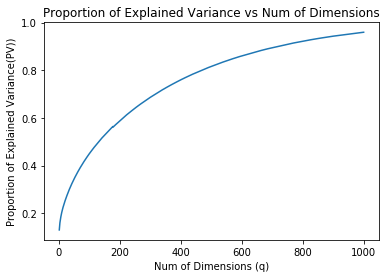

In [90]:
## TO DO STARTS HERE ##

arr=[]
q = range(1,1001)
for n in q:
    model = PCA(n_components=n)
    model.fit_transform(X)
    PV=model.explained_variance_ratio_
    arr.append(sum(PV))

plt.plot(q,arr)
plt.title('Proportion of Explained Variance vs Num of Dimensions')
plt.xlabel('Num of Dimensions (q)')
plt.ylabel('Proportion of Explained Variance(PV))')

## TO DO ENDS HERE ##

## 2. Training with NMF

### Part (a)
Similarly to PCA in Part 1, use the NMF implemented in Sci-Kit learn to obtain the low-dimensional projection of ${\bf X}$ (i.e. get ${\bf W}$ and ${\bf Z}$) for when $q = 5$.  Read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html) carefully.  In particular, make sure you are computing the correct ${\bf W}$ and ${\bf Z}$.

In [91]:
## TO DO STARTS HERE ##
q=5

nmf = NMF(n_components=q)

W = nmf.fit_transform(X)
Z = nmf.components_


## TO DO ENDS HERE ##

print("W has shape ", W.shape)
print("Z has shape ", Z.shape)

W has shape  (1771, 5)
Z has shape  (5, 2369)


### Part (b)

Define the reconstruction error
$$
R(q) := \frac{1}{2}\|{\bf X} - {\bf WZ}\|_F^2
$$
where
$$
\|M\|_F^2 = \sum_{i = 1}^m \sum_{j = 1}^k M_{ij}^2
$$
is the Frobenius norm of $M \in \mathbb{R}^{m \times k}$.  Make a plot of the reconstuction error $R(q)$ versus $q$ for $q = 5, 10, 15, \ldots, 50$.  Make sure the plot is clear with labeled axes and an appropriate title.  For this you can just use the `reconstruction_err_` attribute provided in Sci-kit learn.

Text(0, 0.5, 'Reconstruction Error (R)')

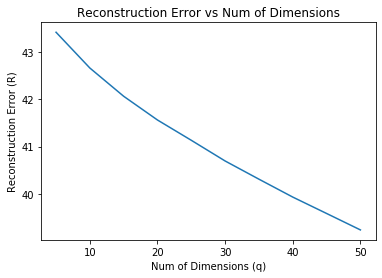

In [92]:
## TO DO STARTS HERE ##

arr=[]
q = range(5,51,5)
for n in q:
    model = NMF(n_components=n)
    model.fit_transform(X)
    R=model.reconstruction_err_
    arr.append(R)

plt.plot(q,arr)
plt.title('Reconstruction Error vs Num of Dimensions')
plt.xlabel('Num of Dimensions (q)')
plt.ylabel('Reconstruction Error (R)')

## TO DO ENDS HERE ##

## 3.  Interpreting the principal components

Consider the dataset
$$
{\bf X} = [{\bf x}_1; {\bf x}_2; {\bf x}_3] = \begin{bmatrix}
1 & 2 & 3\\
1 & 2 & 3
\end{bmatrix}
$$
Although this data is 2-dimensional, it actually lives on the 1 dimensional line $x_1 = x_2$.  Without doing any computation, answer the following with short explanations:

1.  What is the first principal component (i.e. first eigenvector)?  

2.  What is the second principal component?

3.  What is the proportion of variance explained by only the first principal component?

4.  What are the matrices ${\bf W}, {\bf Z}$ when $q = 1$?  Normalize the columns of ${\bf W}$ to have unit norm.

**Answer goes here**
1.  The first principal component is the linear combination of the features that has the largest variance along $Z_1$. The first principal component is the eigenvector with the highest eigenvalue. This represents the direction in which the data has maximum variance -- i.e. where it is the most spread out. This is $[1,1]$.
2.  The second principal component is the linear combination of the features that has the maximal variance along $Z_2$. The second principal component (second eigenvector) will be orthogonal to the first principal component and is the dimension/direction corresponding to the second largest variance/eigenvalue. This is $[1,-1]$.
3.  The proportion of variance explained by only the first principal component is 1, which means the first principal component can explains 100% of the variability in dataset ${\bf X}$.
4.  $𝐖=[1 1]$ and $𝐙=[−1 0 1]$ 

## 4.  Reconstruction error and low-dimensional data

More generally suppose that we can write ${\bf X} = {\bf uv}^T$ for some vectors ${\bf u} \in \mathbb{R}^{d},{\bf v} \in \mathbb{R}^N$.  What is the first principal component (normalized to have unit norm)? What is the minimum dimension $q$ we need to have zero reconstruction error?  

**Answer goes here**
We use svd to find $W$ and $Z$ first, then we find the minimum dimension $q$ that results in zero reconstruction error.   The reconstruction error is $∥X−WZ∥^2_F$.  This is zero when $X=WZ$. The first principal component is ${\bf u}$ because ${\bf u}$ is the eigenvector of ${\bf uv}^T$. ${\bf u}$ represents the eigenvector that transforms ${\bf v}$ to the space $X$. The minimum dimension is $q =1$.